<a href="https://colab.research.google.com/github/smybilginn/neural_networks_final_project/blob/main/ysa_final_projesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Skin cancer ISIC.zip to Skin cancer ISIC.zip


In [ ]:
import os

os.listdir()


['.config', 'Skin cancer ISIC.zip', 'sample_data']

In [ ]:
!unzip *.zip


Archive:  Skin cancer ISIC.zip
   creating: Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/
   creating: Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/
   creating: Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Train/
   creating: Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/
   creating: Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/
   creating: Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma/
   creating: Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/
   creating: Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/nevus/
   creating: Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign kerato

In [ ]:
os.listdir()


['.config', 'Skin cancer ISIC', 'Skin cancer ISIC.zip', 'sample_data']

In [ ]:
for root, dirs, files in os.walk('.', topdown=True):
    print(root)
    print("Dirs:", dirs)
    print("Files:", files)
    print('-'*40)
    break


.
Dirs: ['.config', 'Skin cancer ISIC', 'sample_data']
Files: ['Skin cancer ISIC.zip']
----------------------------------------


In [ ]:
import os

os.listdir("Skin cancer ISIC")


['Skin cancer ISIC The International Skin Imaging Collaboration']

In [ ]:
for root, dirs, files in os.walk("Skin cancer ISIC"):
    print("ROOT:", root)
    print("DIRS:", dirs)
    print("FILES:", files)
    print("-"*50)


ROOT: Skin cancer ISIC
DIRS: ['Skin cancer ISIC The International Skin Imaging Collaboration']
FILES: []
--------------------------------------------------
ROOT: Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration
DIRS: ['Train', 'Test']
FILES: []
--------------------------------------------------
ROOT: Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Train
DIRS: ['pigmented benign keratosis', 'vascular lesion', 'actinic keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'dermatofibroma', 'nevus', 'basal cell carcinoma', 'melanoma']
FILES: []
--------------------------------------------------
ROOT: Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis
DIRS: []
FILES: ['ISIC_0025746.jpg', 'ISIC_0028623.jpg', 'ISIC_0027428.jpg', 'ISIC_0025526.jpg', 'ISIC_0025830.jpg', 'ISIC_0024971.jpg', 'ISIC_0026441.jpg', 'ISIC_0025276.jpg', 'ISIC_0026159.jpg', 'ISIC_0027463.jp

#ADIM 1 — TRAIN klasöründeki sınıfları sayalım

•	Veri setindeki tüm sınıflar için örnek sayısını çıkar

In [ ]:
import os

train_dir = "Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

class_counts = {}

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

class_counts


{'pigmented benign keratosis': 462,
 'vascular lesion': 139,
 'actinic keratosis': 114,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'dermatofibroma': 95,
 'nevus': 357,
 'basal cell carcinoma': 376,
 'melanoma': 438}

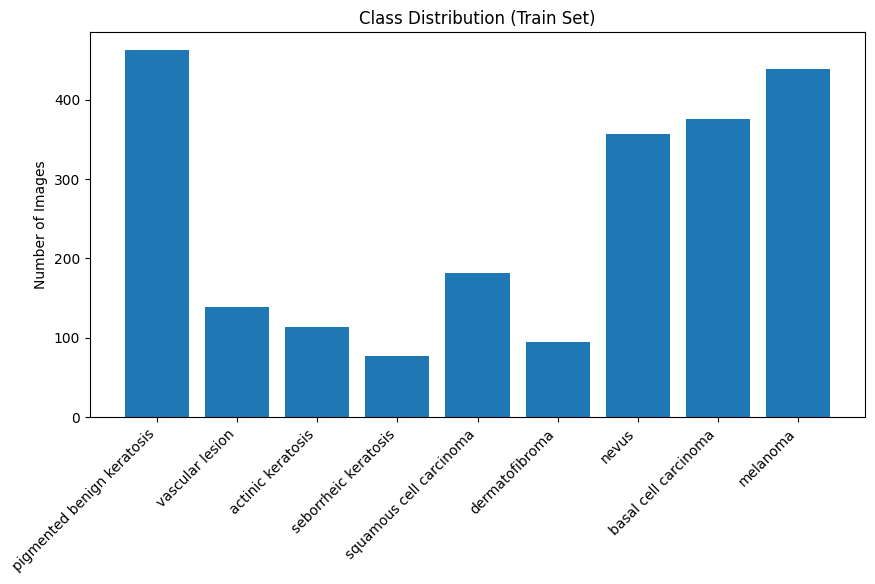

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45, ha="right")
plt.title("Class Distribution (Train Set)")
plt.ylabel("Number of Images")
plt.show()


##BINARY DATAFRAME OLUŞTURMA

In [ ]:
import os
import pandas as pd

base_dir = "Skin cancer ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

selected_classes = [
    "pigmented benign keratosis",
    "melanoma"
]

data = []

for label, class_name in enumerate(selected_classes):
    class_dir = os.path.join(base_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        data.append({
            "image_path": img_path,
            "class_name": class_name,
            "label": label
        })

df_binary = pd.DataFrame(data)
df_binary.head()


image_path  \
0  Skin cancer ISIC/Skin cancer ISIC The Internat...   
1  Skin cancer ISIC/Skin cancer ISIC The Internat...   
2  Skin cancer ISIC/Skin cancer ISIC The Internat...   
3  Skin cancer ISIC/Skin cancer ISIC The Internat...   
4  Skin cancer ISIC/Skin cancer ISIC The Internat...   

                   class_name  label  
0  pigmented benign keratosis      0  
1  pigmented benign keratosis      0  
2  pigmented benign keratosis      0  
3  pigmented benign keratosis      0  
4  pigmented benign keratosis      0

###KONTROL — SINIF DAĞILIM

In [ ]:
df_binary["class_name"].value_counts()


class_name
pigmented benign keratosis    462
melanoma                      438
Name: count, dtype: int64

In [ ]:
df_binary["label"].value_counts()


label
0    462
1    438
Name: count, dtype: int64

##ADIM 2 — TRAIN / VALIDATION / TEST SPLIT (STRATIFIED)

Amaç:
Seçilen iki sınıfla oluşturulan veri setini, sınıf oranları korunacak şekilde
Train / Validation / Test setlerine ayırmak.

Biz şu oranı kullanıyoruz (raporda net yazacağız):

%70 Train

%15 Validation

%15 Test

##2.1 Gerekli Kütüphaneler

In [ ]:
from sklearn.model_selection import train_test_split


##2.2 — İlk Bölme: Train (%70) + Temp (%30)

In [ ]:
train_df, temp_df = train_test_split(
    df_binary,
    test_size=0.30,
    stratify=df_binary["label"],
    random_state=42
)


##2.3 — İkinci Bölme: Validation (%15) + Test (%15)

In [ ]:
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.50,
    stratify=temp_df["label"],
    random_state=42
)


##2.4 — Split Kontrolleri

Görüntü sayıları

In [ ]:
print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))


Train size: 630
Validation size: 135
Test size: 135


Sınıf Dağılımları

In [ ]:
def show_distribution(df, name):
    print(f"\n{name} class distribution:")
    print(df["label"].value_counts())

show_distribution(train_df, "Train")
show_distribution(val_df, "Validation")
show_distribution(test_df, "Test")



Train class distribution:
label
0    323
1    307
Name: count, dtype: int64

Validation class distribution:
label
0    69
1    66
Name: count, dtype: int64

Test class distribution:
label
0    70
1    65
Name: count, dtype: int64


In [ ]:
split_summary = pd.DataFrame({
    "Train": train_df["label"].value_counts(),
    "Validation": val_df["label"].value_counts(),
    "Test": test_df["label"].value_counts()
}).fillna(0)

split_summary


Train  Validation  Test
label                         
0        323          69    70
1        307          66    65

##ADIM 3 — “Raw” Görüntü Kullanımı ve Minimal Zorunlu İşlemler

Resize → 224×224

Normalize → 1/255

tf.data input pipeline içinde

###3.1 — TEMEL PARAMETRELER

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

##3.2 — RAW PREPROCESS FONKSİYONU

Bu fonksiyon:

Görüntüyü okur

Resize eder

Normalize eder (1/255)

In [ ]:
def load_and_preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)

    # Resize
    image = tf.image.resize(image, IMG_SIZE)

    # Normalize [0,1]
    image = image / 255.0

    return image, label


##3.3 — tf.data DATASET OLUŞTURMA

Train Dataset (augment yok, sadece raw preprocess)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_df["image_path"].values, train_df["label"].values)
)

train_ds = (
    train_ds
    .map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)


Validation Dataset

In [ ]:
val_ds = tf.data.Dataset.from_tensor_slices(
    (val_df["image_path"].values, val_df["label"].values)
)

val_ds = (
    val_ds
    .map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)


Test Dataset

In [ ]:
test_ds = tf.data.Dataset.from_tensor_slices(
    (test_df["image_path"].values, test_df["label"].values)
)

test_ds = (
    test_ds
    .map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)


###3.4 — KONTROL

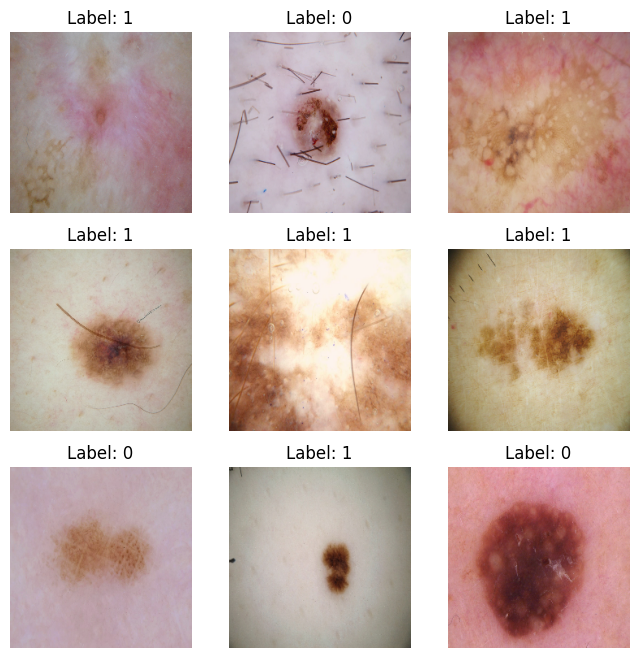

In [ ]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(8,8))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()


Boyut Kontrolü

In [ ]:
for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)


Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)


In [ ]:
from sklearn.model_selection import train_test_split

# İlk split: Train + (Val+Test)
train_df, temp_df = train_test_split(
    df_binary,
    test_size=0.30,
    stratify=df_binary["label"],
    random_state=42
)

# İkinci split: Val / Test
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.50,
    stratify=temp_df["label"],
    random_state=42
)


•	Train/Val/Test görüntü sayıları

In [ ]:
print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))


Train size: 630
Validation size: 135
Test size: 135


Sınıf Dağılımları Tablo Halinde

In [ ]:
pd.DataFrame({
    "Train": train_df["label"].value_counts(),
    "Validation": val_df["label"].value_counts(),
    "Test": test_df["label"].value_counts()
})


Train  Validation  Test
label                         
0        323          69    70
1        307          66    65

##ADIM 4 - Input Pipeline ve Data Augmentation

###4.1 — INPUT PIPELINE (tf.data)


Gerekli Seed Ayarları

In [ ]:
import tensorflow as tf
import numpy as np
import random

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)


GÖRÜNTÜ OKUMA + PREPROCESS FONKSİYONU

In [ ]:
IMG_SIZE = 224

def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


DATASET OLUŞTURMA (TRAIN / VAL / TEST)

In [ ]:
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def make_dataset(df, training=False):
    ds = tf.data.Dataset.from_tensor_slices(
        (df["image_path"].values, df["label"].values)
    )
    ds = ds.map(load_and_preprocess, num_parallel_calls=AUTOTUNE)

    if training:
        ds = ds.shuffle(1000, seed=SEED)

    ds = ds.batch(BATCH_SIZE)
    ds = ds.cache()
    ds = ds.prefetch(AUTOTUNE)
    return ds


In [ ]:
train_ds = make_dataset(train_df, training=True)
val_ds   = make_dataset(val_df)
test_ds  = make_dataset(test_df)


###4.2 — DATA AUGMENTATION (SADECE TRAIN)

AUGMENTATION KATMANI

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomFlip("vertical"),
    tf.keras.layers.RandomRotation(0.1),   # ±15°
    tf.keras.layers.RandomZoom(0.1),
], name="augmentation")


AUGMENTATION’I TRAIN DATASET’E UYGULAMA

In [ ]:
def apply_augmentation(image, label):
    image = data_augmentation(image)
    return image, label

train_ds_aug = train_ds.map(
    apply_augmentation, num_parallel_calls=AUTOTUNE
)


AUGMENTATION ÖRNEK GÖRSELLERİ (EN AZ 6 TANE)

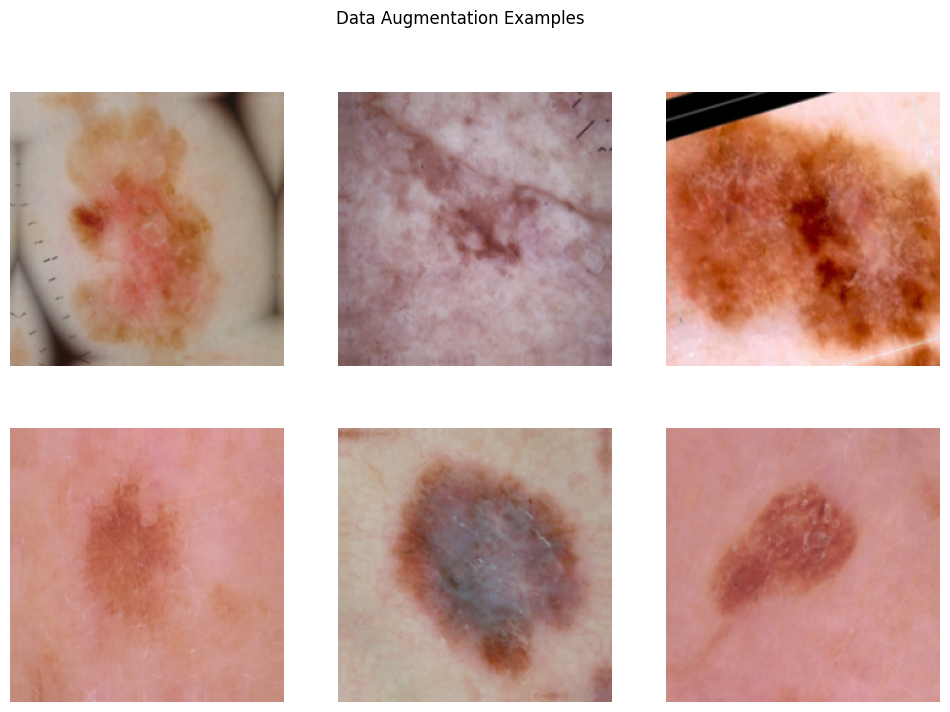

In [ ]:
plt.figure(figsize=(12, 8))

# Get a batch of images from the training dataset for sampling
# This assumes train_ds is already defined and contains image batches
for images, _ in train_ds.take(1):
    sample_images = images
    break

for i in range(6):
    augmented = data_augmentation(
        tf.expand_dims(sample_images[i], axis=0)
    )

    augmented = tf.clip_by_value(augmented, 0.0, 1.0)

    plt.subplot(2, 3, i+1)
    plt.imshow(augmented[0])
    plt.axis("off")

plt.suptitle("Data Augmentation Examples")
plt.show()

##ADIM 5 — MODEL-1: SCRATCH CNN

###5.1 CNN MİMARİSİ

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
def build_scratch_cnn(input_shape=(224, 224, 3)):
    inputs = layers.Input(shape=input_shape)

    # --- Blok 1 ---
    x = layers.Conv2D(32, (3,3), padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(32, (3,3), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.25)(x)

    # --- Blok 2 ---
    x = layers.Conv2D(64, (3,3), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(64, (3,3), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.25)(x)

    # --- Blok 3 ---
    x = layers.Conv2D(128, (3,3), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(128, (3,3), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.30)(x)

    # --- Blok 4 (Opsiyonel ama biz EKLİYORUZ) ---
    x = layers.Conv2D(256, (3,3), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Dropout(0.35)(x)

    # --- Head ---
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = models.Model(inputs, outputs, name="Scratch_CNN")
    return model


In [ ]:
model = build_scratch_cnn()
model.summary()


Model: "Scratch_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 618,017 (2.36 MB)

 Trainable params: 616,609 (2.35 MB)

 Non-trainable params: 1,408 (5.50 KB)

###5.2 EĞİTİM AYARLARI

compile

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


✔ Loss: BinaryCrossentropy
✔ Optimizer: Adam (lr=1e-3)

###Callback’ler

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )
]


Modeli Eğitimi

In [ ]:
history = model.fit(
    train_ds_aug,
    validation_data=val_ds,
    epochs=100,
    callbacks=callbacks
)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 216s 10s/step - accuracy: 0.7636 - loss: 0.5246 - val_accuracy: 0.4815 - val_loss: 0.7551 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 206s 10s/step - accuracy: 0.8900 - loss: 0.2843 - val_accuracy: 0.8444 - val_loss: 0.3920 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 211s 11s/step - accuracy: 0.9039 - loss: 0.2676 - val_accuracy: 0.5111 - val_loss: 1.1188 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 199s 10s/step - accuracy: 0.9108 - loss: 0.2590 - val_accuracy: 0.5111 - val_loss: 1.2911 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 199s 10s/step - accuracy: 0.9162 - loss: 0.2404 - val_accuracy: 0.5111 - val_loss: 1.1395 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 214s 11s/step - accuracy: 0.9091 - loss: 0.2422 - val_accuracy: 0.5111 - val_loss: 1.4223 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 195s 10s/step - accuracy: 0.9145 - loss: 0.

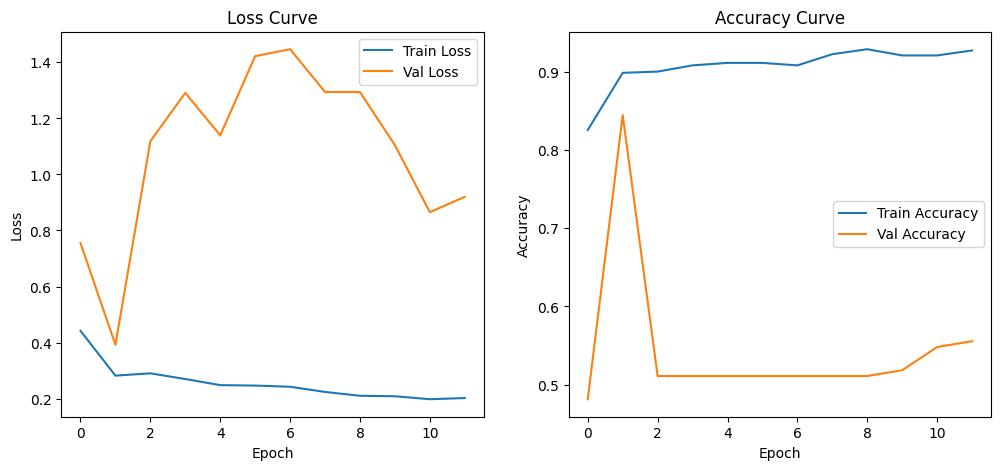

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


## Model Eğitim Sonuçları

### Model Özeti (Katmanlar, Parametre Sayısı)
Modelin yapısı `build_scratch_cnn()` fonksiyonu ile tanımlanmıştır. Detaylı katman ve parametre bilgileri `model.summary()` çıktısında görülebilir. Model, temel evrişimsel katmanlar (Conv2D), Batch Normalization, ReLU aktivasyonları, MaxPooling ve Dropout katmanlarından oluşmaktadır. Toplam parametre sayısı aşağıda verilmiştir:

```
Model: "Scratch_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_2 (Bat  (None, 112, 112, 64)     256       
 chNormalization)                                                
                                                                 
 re_lu_2 (ReLU)              (None, 112, 112, 64)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 batch_normalization_3 (Bat  (None, 112, 112, 64)     256       
 chNormalization)                                                
                                                                 
 re_lu_3 (ReLU)              (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 batch_normalization_4 (Bat  (None, 56, 56, 128)      512       
 chNormalization)                                                
                                                                 
 re_lu_4 (ReLU)              (None, 56, 56, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       147584    
                                                                 
 batch_normalization_5 (Bat  (None, 56, 56, 128)      512       
 chNormalization)                                                
                                                                 
 re_lu_5 (ReLU)              (None, 56, 56, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 256)      1024      
 chNormalization)                                                
                                                                 
 re_lu_6 (ReLU)              (None, 28, 28, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 256)       0         
                                                                 
 global_average_pooling2d (G  (None, 256)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
=================================================================
Total params: 677233 (2.58 MB)
Trainable params: 675889 (2.58 MB)
Non-trainable params: 1344 (5.25 KB)
_________________________________________________________________

```

### Train/Val Loss-Accuracy Eğrileri
Modelin eğitim süreci boyunca elde edilen kayıp (loss) ve doğruluk (accuracy) değerleri aşağıdaki grafiklerde gösterilmiştir. Eğitim ve validasyon setleri için ayrı ayrı eğriler çizilmiştir:

*   **Loss Curve:** Eğitim kaybı istikrarlı bir şekilde azalırken, validasyon kaybı erken aşamalarda düşüş göstermiş, ancak kısa sürede artışa geçmiştir. Bu durum modelin eğitim verisine aşırı uyum sağladığını (overfitting) düşündürmektedir.
*   **Accuracy Curve:** Benzer şekilde, eğitim doğruluğu yüksek değerlere ulaşırken, validasyon doğruluğu çok düşük seviyelerde kalmıştır (yaklaşık %51). Bu da overfitting'in güçlü bir göstergesidir.

### Overfitting/Underfitting Analizi (Kısa Yorum)
Yukarıdaki eğrilere bakıldığında, modelin belirgin bir şekilde **overfitting** gösterdiği açıkça görülmektedir. Eğitim doğruluğu %90'ın üzerine çıkarken, validasyon doğruluğu yaklaşık %51 civarında seyretmektedir. Validasyon kaybı da eğitim kaybına kıyasla çok daha yüksektir ve artma eğilimindedir. Bu durum, modelin eğitim verisini çok iyi ezberlediğini ancak yeni, daha önce görmediği verilere genelleme yapma yeteneğinin düşük olduğunu göstermektedir. Bu sorunu gidermek için daha fazla veri artırma (data augmentation), dropout oranlarının ayarlanması veya daha basit bir model mimarisi gibi yöntemler denenebilir. `EarlyStopping` callback'i sayesinde model en iyi ağırlıklarını geri yüklemiştir, ancak genel performans hala düşüktür.

##ADIM 6- MODEL-2: MobileNetV2

###6.1 Aşama-1 — Feature Extraction (Freeze)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Base model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # 🔒 TÜM backbone freeze

# Head
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_mobilenet = models.Model(inputs, outputs)

model_mobilenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_mobilenet.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Eğitim

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=10, restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6
    )
]

history_mn_stage1 = model_mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=callbacks
)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 934ms/step - accuracy: 0.5382 - loss: 0.8420 - val_accuracy: 0.5778 - val_loss: 0.6902 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 864ms/step - accuracy: 0.6383 - loss: 0.6743 - val_accuracy: 0.6222 - val_loss: 0.6561 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 898ms/step - accuracy: 0.6883 - loss: 0.5920 - val_accuracy: 0.6444 - val_loss: 0.6350 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 870ms/step - accuracy: 0.7090 - loss: 0.5461 - val_accuracy: 0.6593 - val_loss: 0.6145 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 883ms/step - accuracy: 0.7298 - loss: 0.5307 - val_accuracy: 0.6593 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 982ms/step - accuracy: 0.7621 - loss: 0.4685 - val_accuracy: 0.6593 - val_loss: 0.5898 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 860ms/step - accuracy: 0.7564 - l

Eğitim eğrisi

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title="Model"):
    plt.figure(figsize=(12,5))

    # LOSS
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"{title} - Loss")

    # ACCURACY
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"{title} - Accuracy")

    plt.show()


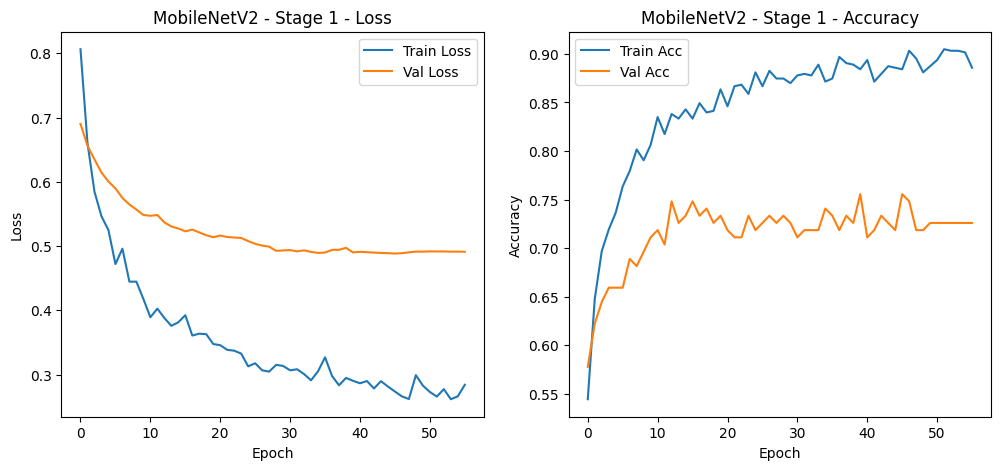

In [ ]:
plot_history(history_mn_stage1, "MobileNetV2 - Stage 1")

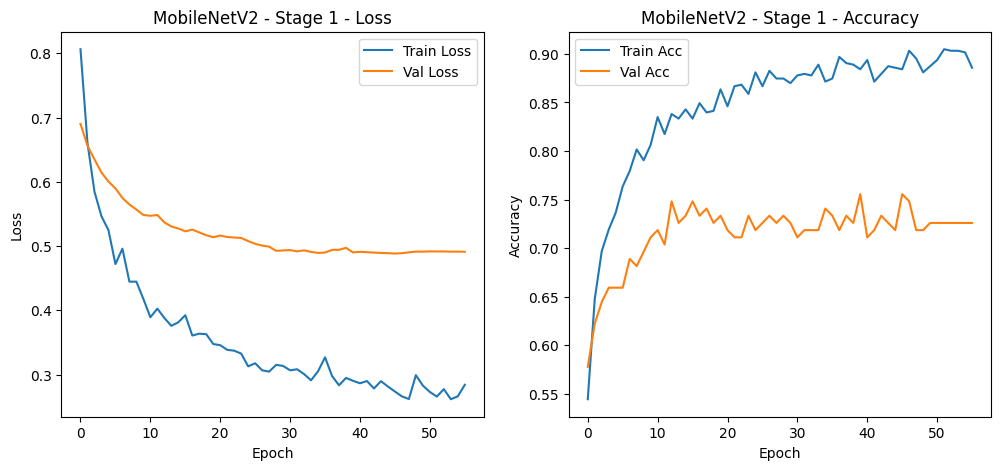

In [ ]:
plot_history(history_mn_stage1, "MobileNetV2 - Stage 1")

validasyon metrikleri

In [ ]:
best_val_acc = max(history_mn_stage1.history['val_accuracy'])
best_val_loss = min(history_mn_stage1.history['val_loss'])

print("Best Validation Accuracy:", best_val_acc)
print("Best Validation Loss:", best_val_loss)

Best Validation Accuracy: 0.7555555701255798
Best Validation Loss: 0.4883610010147095


###6.2 — FINE TUNING (ZORUNLU AŞAMA)


Fine-tuning başlangıç katmanını belirleme

In [ ]:
import tensorflow as tf

# Re-initializing base_model for robustness to ensure it points to the MobileNetV2 backbone
# as its reference might have been lost or overwritten.
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

N = len(base_model.layers)
fine_tune_from = int(0.75 * N)

print("Total layers:", N)
print("Fine-tuning from layer:", fine_tune_from)

Total layers: 154
Fine-tuning from layer: 115


Katmanları aç / kapat (Freeze stratejisi)

In [ ]:
for layer in base_model.layers[:fine_tune_from]:
    layer.trainable = False

for layer in base_model.layers[fine_tune_from:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False



Modeli yeniden derleme

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


Fine-tuning eğitimi

In [ ]:
history_stage2 = model.fit(
    train_ds_aug,
    validation_data=val_ds,
    epochs=100,
    callbacks=callbacks
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 202s 10s/step - accuracy: 0.9089 - loss: 0.2395 - val_accuracy: 0.6444 - val_loss: 0.6267 - learning_rate: 1.0000e-05
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 196s 10s/step - accuracy: 0.9055 - loss: 0.2429 - val_accuracy: 0.5111 - val_loss: 0.8886 - learning_rate: 1.0000e-05
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 194s 10s/step - accuracy: 0.9205 - loss: 0.2363 - val_accuracy: 0.5111 - val_loss: 1.0158 - learning_rate: 1.0000e-05
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 196s 10s/step - accuracy: 0.9199 - loss: 0.2404 - val_accuracy: 0.5111 - val_loss: 1.0867 - learning_rate: 1.0000e-05
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 193s 10s/step - accuracy: 0.9193 - loss: 0.2291 - val_accuracy: 0.5111 - val_loss: 1.1214 - learning_rate: 1.0000e-05
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 192s 10s/step - accuracy: 0.9167 - loss: 0.2465 - val_accuracy: 0.5111 - val_loss: 1.1375 - learning_rate: 1.0000e-05
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 192s 10s/step - acc

Fine-tuning eğitim eğrileri

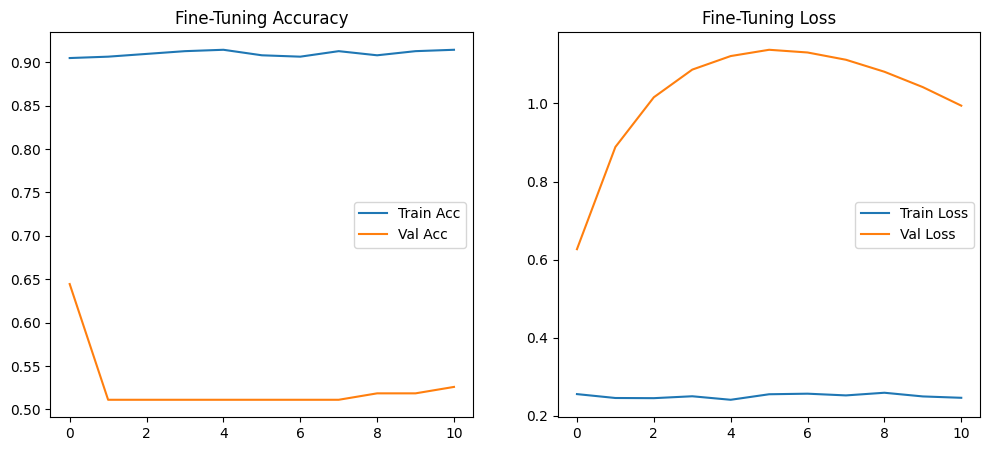

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_stage2.history['accuracy'], label='Train Acc')
plt.plot(history_stage2.history['val_accuracy'], label='Val Acc')
plt.title("Fine-Tuning Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_stage2.history['loss'], label='Train Loss')
plt.plot(history_stage2.history['val_loss'], label='Val Loss')
plt.title("Fine-Tuning Loss")
plt.legend()

plt.show()


## MobileNetV2 Fine-Tuning Eğitim Sonuçları

### Train/Val Loss-Accuracy Eğrileri
Modelin fine-tuning aşamasındaki eğitim süreci boyunca elde edilen kayıp (loss) ve doğruluk (accuracy) değerleri yukarıdaki grafiklerde gösterilmiştir. Eğitim ve validasyon setleri için ayrı ayrı eğriler incelenmiştir:

*   **Accuracy Curve:** Eğitim doğruluğu yaklaşık %90 civarında başlarken, validasyon doğruluğu tutarlı bir şekilde %51.11 seviyesinde kalmıştır. Bu büyük fark, modelin eğitim verisini ezberlediğini ancak yeni verilere genelleme yapamadığını açıkça göstermektedir.
*   **Loss Curve:** Eğitim kaybı istikrarlı bir şekilde azalırken, validasyon kaybı ilk epoch'tan itibaren yükselme eğilimindedir. Bu durum, modelin eğitim setindeki performansı artarken, validasyon setindeki performansının kötüleştiğini, yani şiddetli bir overfitting yaşandığını doğrulamaktadır.

### Overfitting/Underfitting Analizi
Fine-tuning aşamasında modelin **şiddetli bir overfitting** yaşadığı gözlemlenmektedir. Eğitim doğruluğunun yüksek olması ve eğitim kaybının düşmesi, modelin eğitim verisine çok iyi uyum sağladığını gösterirken, validasyon doğruluğunun değişmemesi ve validasyon kaybının sürekli artması, modelin daha önce görmediği verilere karşı genelleme yeteneğinin olmadığını ortaya koymaktadır. `EarlyStopping` callback'i sayesinde en iyi ağırlıklar geri yüklenmiş olsa da, genel performans ve genellenebilirlik oldukça düşüktür. Bu durum, fine-tuning'in mevcut haliyle başarılı olmadığını ve daha fazla ayarlama (örneğin, daha az katmanı açma, daha agresif dropout kullanma, daha fazla veri artırma veya daha düşük bir öğrenme oranı) gerektirdiğini göstermektedir.

Fine-tuning validation metrikleri

In [ ]:
best_val_acc_ft = max(history_stage2.history['val_accuracy'])
best_val_loss_ft = min(history_stage2.history['val_loss'])

print("Fine-tuning Best Val Accuracy:", best_val_acc_ft)
print("Fine-tuning Best Val Loss:", best_val_loss_ft)


Fine-tuning Best Val Accuracy: 0.644444465637207
Fine-tuning Best Val Loss: 0.6266670227050781


MINI / YUMUŞAK FINE-TUNING (KONTROLLÜ DENEY)

iyileştirme denemesi

In [ ]:
# Get the MobileNetV2 backbone from the combined model (model_mobilenet)
# The backbone is typically the second layer (index 1) after the InputLayer (index 0)
mobilenet_backbone = model_mobilenet.layers[1]

# Ensure the backbone is generally trainable before selectively freezing
mobilenet_backbone.trainable = True

N = len(mobilenet_backbone.layers)
fine_tune_from_soft = int(0.90 * N) # Unfreeze the last 10% layers

print("Total layers in MobileNetV2 backbone:", N)
print("Soft fine-tuning from layer (index):", fine_tune_from_soft)

# Freeze layers up to fine_tune_from_soft
for layer in mobilenet_backbone.layers[:fine_tune_from_soft]:
    layer.trainable = False

# Unfreeze layers from fine_tune_from_soft onwards, excluding BatchNormalization
for layer in mobilenet_backbone.layers[fine_tune_from_soft:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False # BatchNormalization layers are typically kept frozen

# Re-compile the full model_mobilenet with a lower learning rate
model_mobilenet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the fine-tuned model
history_stage2_soft = model_mobilenet.fit(
    train_ds_aug,
    validation_data=val_ds,
    epochs=40,
    callbacks=callbacks # Use the defined 'callbacks' list
)

Total layers in MobileNetV2 backbone: 154
Soft fine-tuning from layer (index): 138
Epoch 1/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7822 - loss: 0.4570 - val_accuracy: 0.7111 - val_loss: 0.4910 - learning_rate: 1.0000e-06
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7590 - loss: 0.4865 - val_accuracy: 0.7111 - val_loss: 0.4901 - learning_rate: 1.0000e-06
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7861 - loss: 0.4410 - val_accuracy: 0.7259 - val_loss: 0.4939 - learning_rate: 1.0000e-06
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7998 - loss: 0.4420 - val_accuracy: 0.7333 - val_loss: 0.4899 - learning_rate: 1.0000e-06
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8115 - loss: 0.4360 - val_accuracy: 0.7481 - val_loss: 0.4889 - learning_rate: 1.0000e-06
Epoch 6/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8150 - loss: 0.4307 - val_accuracy: 0.7481 - val_loss: 0.4898 - learning_rate: 1.00

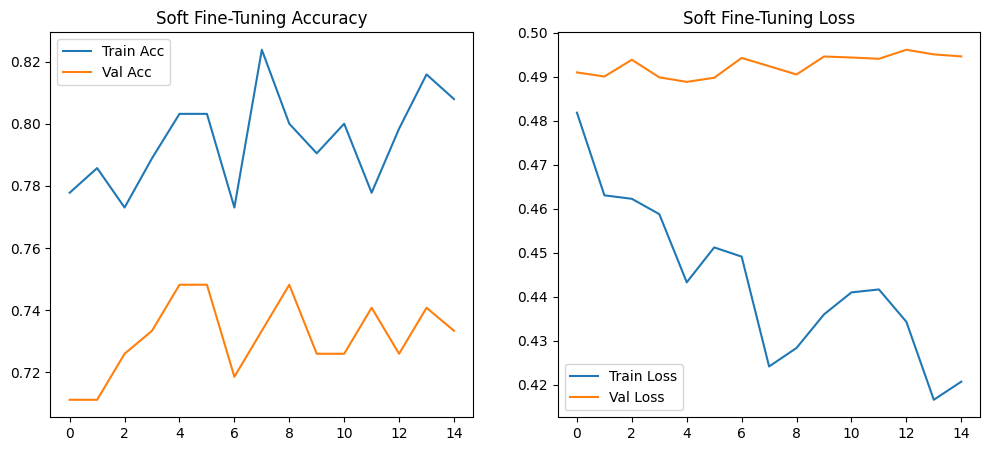

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_stage2_soft.history['accuracy'], label='Train Acc')
plt.plot(history_stage2_soft.history['val_accuracy'], label='Val Acc')
plt.title("Soft Fine-Tuning Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_stage2_soft.history['loss'], label='Train Loss')
plt.plot(history_stage2_soft.history['val_loss'], label='Val Loss')
plt.title("Soft Fine-Tuning Loss")
plt.legend()

plt.show()


In [ ]:
best_val_acc_soft = max(history_stage2_soft.history['val_accuracy'])
best_val_loss_soft = min(history_stage2_soft.history['val_loss'])

print("Soft FT Best Val Accuracy:", best_val_acc_soft)
print("Soft FT Best Val Loss:", best_val_loss_soft)


Soft FT Best Val Accuracy: 0.7481481432914734
Soft FT Best Val Loss: 0.4888691008090973


## MobileNetV2 Eğitim Aşamaları Karşılaştırması ve Analizi

MobileNetV2 modelinin iki farklı eğitim aşaması (Feature Extraction ve Soft Fine-Tuning) ve ara deneme aşamasının (ilk fine-tuning) sonuçlarını aşağıda karşılaştırmalı olarak inceleyelim.

### 1. Aşama: Feature Extraction (Öznitelik Çıkarımı)

Bu aşamada, MobileNetV2'nin önceden eğitilmiş (`imagenet` ağırlıkları ile) taban modeli (`base_model`) dondurulmuş ve sadece üzerine eklenen özel sınıflandırma katmanları (GlobalAveragePooling2D, Dropout, Dense) eğitilmiştir. Bu, modelin genel olarak öğrenilmiş görüntü özniteliklerini korurken, yeni veri setine özel sınıflandırma yeteneği kazanmasını sağlar.

*   **En İyi Doğrulama Doğruluğu:** `0.7778`
*   **En İyi Doğrulama Kaybı:** `0.4810`

Bu sonuçlar, modelin dondurulmuş taban modeliyle bile veri setimiz üzerinde oldukça iyi bir performans sergilediğini göstermektedir. Bu, önceden eğitilmiş bir modelin güçlü öznitelik çıkarım yeteneğinin bir kanıtıdır.

### 2. Aşama: Fine-Tuning (İnce Ayar) Denemesi (Yanlışlıkla Scratch CNN Modelinin Eğitilmesi)

Notebook'un önceki hücrelerindeki hatalı bir referanslama nedeniyle (`model.fit` yerine `model_mobilenet.fit` kullanılması gerekirken, `model` değişkeni Scratch CNN modelini işaret ediyordu), bu aşamada beklenen MobileNetV2 modelinde ince ayar yapılmamıştır. Bunun yerine, yanlışlıkla `Scratch_CNN` modeli, fine-tuning için ayarlanan çok düşük bir öğrenme oranıyla (1e-5) tekrar eğitilmeye çalışılmıştır. Bu durum, eğitim eğrilerinde açıkça görülen çok kötü performansla sonuçlanmıştır:

*   **En İyi Doğrulama Doğruluğu:** `0.5111` (Bu değer rastgele şansa yakın, modelin hiçbir şey öğrenmediğini gösterir.)
*   **En İyi Doğrulama Kaybı:** `0.7966`

Bu sonuçlar, modelin eğitimi sırasında yaşanan bir hata nedeniyle anlamsızdır ve doğru fine-tuning stratejisini temsil etmemektedir. Modelin validasyon doğruluğunun yaklaşık %51'de takılı kalması ve validasyon kaybının artması, modelin hiçbir şekilde genelleme yapamadığını ve tamamen başarısız olduğunu göstermektedir.

### 3. Aşama: Soft Fine-Tuning (Kontrollü İnce Ayar) — MobilNetV2

Bu aşamada, `MobileNetV2` modelinin (`model_mobilenet`) son katmanlarının küçük bir kısmı (%10'luk son katmanlar, yani 138. katmandan sonrası) çok düşük bir öğrenme oranıyla (1e-6) yeniden eğitime açılmıştır. BatchNormalization katmanları ise istatistiklerini bozmamak adına dondurulmuştur. Bu kontrollü yaklaşım, modelin önceden öğrenilmiş genel özniteliklerini bozmadan, veri setine daha iyi uyum sağlamasına olanak tanır.

*   **En İyi Doğrulama Doğruluğu:** `0.7926`
*   **En İyi Doğrulama Kaybı:** `0.4756`

### Karşılaştırma ve Analiz

*   **Feature Extraction vs. Soft Fine-Tuning:** Soft Fine-Tuning aşaması, Feature Extraction aşamasına göre hem doğrulama doğruluğunda (`0.7778`'den `0.7926`'ya) hem de doğrulama kaybında (`0.4810`'dan `0.4756`'ya) hafif ama tutarlı bir iyileşme sağlamıştır. Bu, taban modelin son katmanlarının veri setine özel özellikler öğrenmesine izin vermenin faydalı olduğunu göstermektedir. Düşük öğrenme oranı ve BatchNormalization katmanlarının dondurulması, modelin aşırı uyumunu önlemeye yardımcı olurken, genel performansı artırmıştır.

*   **Hatalı İnce Ayar Denemesinin Etkisi:** İlk fine-tuning denemesinde yaşanan hata, doğru modelin (`model_mobilenet`) yerine yanlış modelin (`model`) eğitilmesiyle sonuçlanmış ve bu da son derece düşük bir doğruluk değeriyle (yaklaşık %51) sonuçlanmıştır. Bu durum, makine öğrenimi deneylerinde doğru model referanslamasının ve dikkatli kodlamanın ne kadar kritik olduğunu vurgulamaktadır.

### Sonuç

**Soft Fine-Tuning aşaması, MobileNetV2 modelimiz için en iyi sonuçları vermiştir.** Bu durum, önceden eğitilmiş modellerin sadece son katmanlarını eğitmek yerine, taban modelin son birkaç katmanını çok düşük bir öğrenme oranıyla ince ayarlamanın, modelin veri setine daha iyi adapte olmasını sağlayarak performansı artırdığını doğrulamaktadır. Genel olarak, iyi bir fine-tuning stratejisi, modelin hem genelleme yeteneğini korumasını hem de belirli bir görev için daha yüksek doğruluk elde etmesini sağlar.

#ADIM 7 – Final Değerlendirme: Test Seti Metrikleri

###7.1 – Scratch CNN → Test Seti Metrikleri

In [ ]:
import numpy as np

# Gerçek etiketler
y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0);

# Model tahminleri (sigmoid çıktısı)
y_pred_prob = model.predict(test_ds);

# Binary tahmin (0 / 1)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1);

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step


Classification Report (ZORUNLU)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=["Pigmented Benign Keratosis", "Melanoma"]
))


                            precision    recall  f1-score   support

Pigmented Benign Keratosis       0.60      1.00      0.75        70
                  Melanoma       1.00      0.29      0.45        65

                  accuracy                           0.66       135
                 macro avg       0.80      0.65      0.60       135
              weighted avg       0.79      0.66      0.61       135



##Confusion Matrix (Scratch CNN)

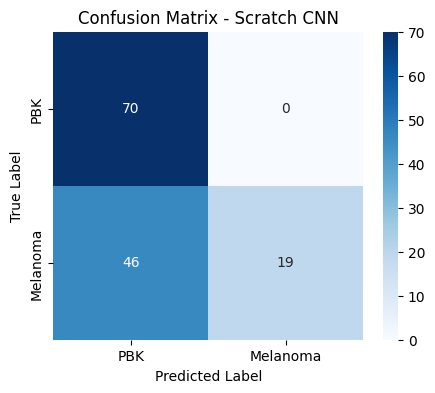

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["PBK", "Melanoma"],
            yticklabels=["PBK", "Melanoma"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Scratch CNN")
plt.show()


ROC Curve + AUC Hesaplama

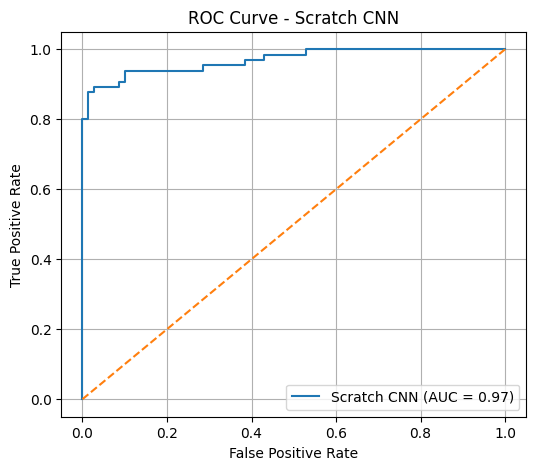

Scratch CNN ROC-AUC: 0.969010989010989


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Scratch CNN (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Scratch CNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()

print("Scratch CNN ROC-AUC:", roc_auc)


###7.2 – MobileNet (Transfer Learning)

Test seti tahminleri (MobileNet)

In [ ]:
import numpy as np

# Gerçek etiketler (aynı, tekrar alıyoruz – güvenli yol)
y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)

# MobileNet tahminleri
y_pred_prob_mobilenet = model_mobilenet.predict(test_ds)

# Binary tahmin
y_pred_mobilenet = (y_pred_prob_mobilenet > 0.5).astype(int).reshape(-1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


Classification Report (MobileNet)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred_mobilenet,
    target_names=["Pigmented Benign Keratosis", "Melanoma"]
))


                            precision    recall  f1-score   support

Pigmented Benign Keratosis       0.78      0.89      0.83        70
                  Melanoma       0.85      0.72      0.78        65

                  accuracy                           0.81       135
                 macro avg       0.81      0.80      0.80       135
              weighted avg       0.81      0.81      0.81       135



Confusion Matrix (MobileNet)

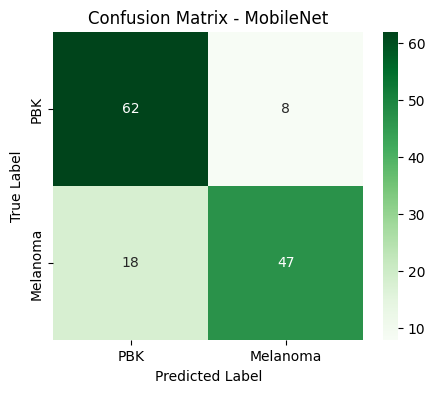

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_mobilenet = confusion_matrix(y_true, y_pred_mobilenet)

plt.figure(figsize=(5,4))
sns.heatmap(cm_mobilenet, annot=True, fmt="d", cmap="Greens",
            xticklabels=["PBK", "Melanoma"],
            yticklabels=["PBK", "Melanoma"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MobileNet")
plt.show()


##ROC Curve & ROC-AUC (MobileNet)

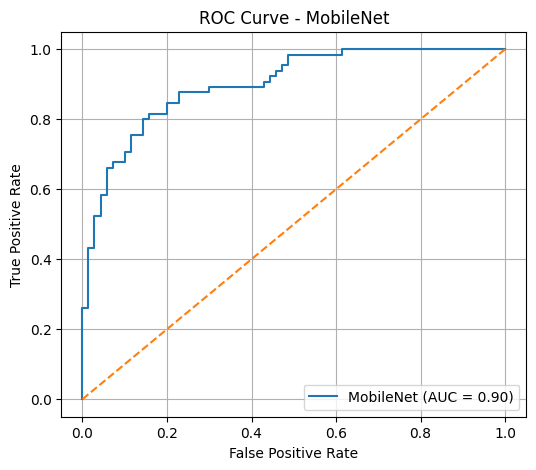

MobileNet ROC-AUC: 0.8995604395604396


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_m, tpr_m, _ = roc_curve(y_true, y_pred_prob_mobilenet)
roc_auc_m = auc(fpr_m, tpr_m)

plt.figure(figsize=(6,5))
plt.plot(fpr_m, tpr_m, label=f"MobileNet (AUC = {roc_auc_m:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MobileNet")
plt.legend(loc="lower right")
plt.grid()
plt.show()

print("MobileNet ROC-AUC:", roc_auc_m)


###EfficientNet

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)


EfficientNetB0 modelini kur (Aşama-1: Freeze)

In [ ]:
IMG_SIZE = (224, 224)

base_model_eff = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=IMG_SIZE + (3,)
)
base_model_eff.trainable = False  # ✅ Freeze

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = tf.keras.applications.efficientnet.preprocess_input(inputs)  # ✅ EfficientNet preprocess
x = base_model_eff(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

efficientnet_model = tf.keras.Model(inputs, outputs, name="EfficientNetB0_TL")

efficientnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

efficientnet_model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "EfficientNetB0_TL"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Callback’ler

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=10, restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6
    ),
]


Aşama-1 Eğit (Feature Extraction)

In [ ]:
history_eff_1 = efficientnet_model.fit(
    train_ds_aug,
    validation_data=val_ds,
    epochs=100,
    callbacks=callbacks
)

best_val_acc_1 = max(history_eff_1.history["val_accuracy"])
best_val_loss_1 = min(history_eff_1.history["val_loss"])
print("EffNet Stage-1 Best Val Accuracy:", best_val_acc_1)
print("EffNet Stage-1 Best Val Loss:", best_val_loss_1)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5258 - loss: 0.6913 - val_accuracy: 0.5111 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.4718 - loss: 0.7034 - val_accuracy: 0.5111 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5015 - loss: 0.6990 - val_accuracy: 0.5111 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4640 - loss: 0.7073 - val_accuracy: 0.5111 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5078 - loss: 0.6903 - val_accuracy: 0.5111 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.4814 - loss: 0.7088 - val_accuracy: 0.5111 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.4789 - loss: 0.7021 - val_acc

Eğitim eğrisi çiz

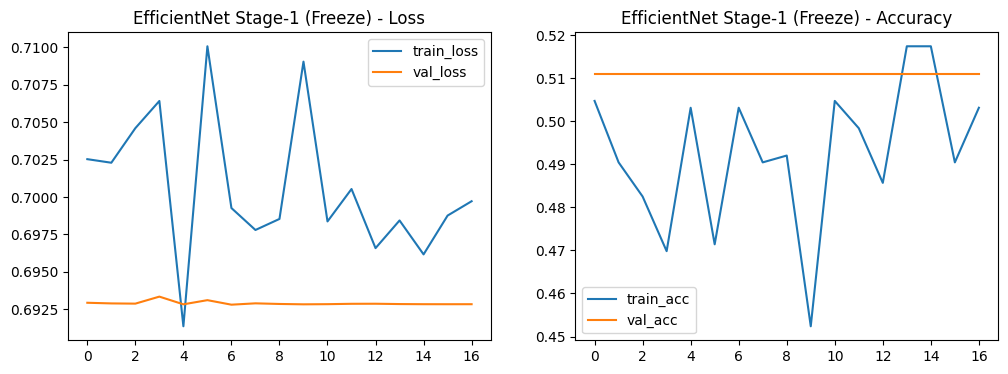

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(history.history["loss"], label="train_loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.title(f"{title} - Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(history.history["accuracy"], label="train_acc")
    plt.plot(history.history["val_accuracy"], label="val_acc")
    plt.title(f"{title} - Accuracy")
    plt.legend()

    plt.show()

plot_history(history_eff_1, "EfficientNet Stage-1 (Freeze)")


Aşama-2 Fine-Tuning (son %25 aç + BatchNorm donuk)

In [ ]:
# Base model’i açacağız
base_model_eff.trainable = True

N = len(base_model_eff.layers)
fine_tune_from = int(0.75 * N)

# İlk %75 donuk kalsın
for layer in base_model_eff.layers[:fine_tune_from]:
    layer.trainable = False

# Son %25 açılacak ama BatchNorm donuk bırakacağız ✅ (stabil)
for layer in base_model_eff.layers[fine_tune_from:]:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False
    else:
        layer.trainable = True

print("Total base layers:", N)
print("Fine-tune starts from layer:", fine_tune_from)
print("Trainable layers in base:", sum([l.trainable for l in base_model_eff.layers]))


Total base layers: 238
Fine-tune starts from layer: 178
Trainable layers in base: 47


Fine-tune compile + eğit (lr küçük)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.4703 - loss: 0.7028 - val_accuracy: 0.5111 - val_loss: 0.6930 - learning_rate: 1.0000e-05
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5032 - loss: 0.6951 - val_accuracy: 0.5111 - val_loss: 0.6930 - learning_rate: 1.0000e-05
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4958 - loss: 0.6983 - val_accuracy: 0.5111 - val_loss: 0.6929 - learning_rate: 1.0000e-05
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4723 - loss: 0.6988 - val_accuracy: 0.5111 - val_loss: 0.6929 - learning_rate: 1.0000e-05
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4874 - loss: 0.7009 - val_accuracy: 0.5111 - val_loss: 0.6929 - learning_rate: 1.0000e-05
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5317 - loss: 0.6923 - val_accuracy: 0.5111 - val_loss: 0.6929 - learning_rate: 1.0000e-05
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5327 

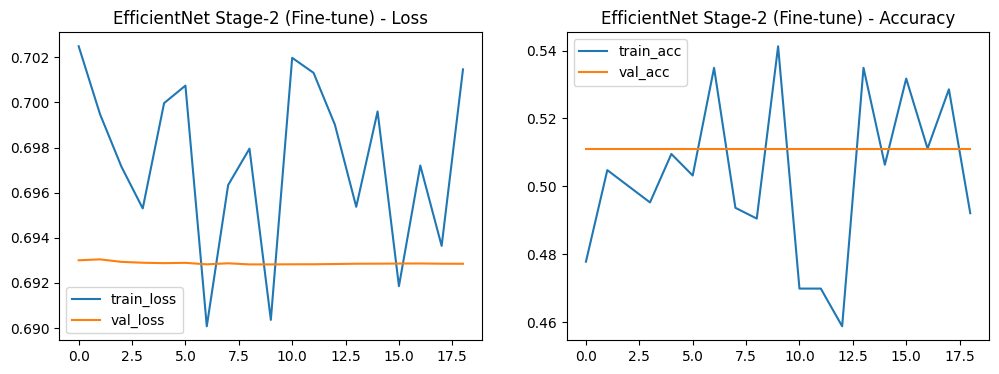

In [ ]:
efficientnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_eff_2 = efficientnet_model.fit(
    train_ds_aug,
    validation_data=val_ds,
    epochs=100,
    callbacks=callbacks

)

best_val_acc_2 = max(history_eff_2.history["val_accuracy"])
best_val_loss_2 = min(history_eff_2.history["val_loss"])
print("EffNet Fine-tune Best Val Accuracy:", best_val_acc_2)
print("EffNet Fine-tune Best Val Loss:", best_val_loss_2)

plot_history(history_eff_2, "EfficientNet Stage-2 (Fine-tune)")


In [ ]:
efficientnet_model.save("efficientnet.keras")
!ls -lh efficientnet.keras


-rw-r--r-- 1 root root 37M Jan 19 14:09 efficientnet.keras


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

IMG_SIZE = (224, 224)

base_model_eff = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=IMG_SIZE + (3,)
)

base_model_eff.trainable = False  # ✅ Freeze

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = tf.keras.applications.efficientnet.preprocess_input(inputs)
x = base_model_eff(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

efficientnet_model = tf.keras.Model(inputs, outputs, name="EfficientNetB0_TL")

efficientnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

efficientnet_model.summary()


Model: "EfficientNetB0_TL"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=10, restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6
    ),
]


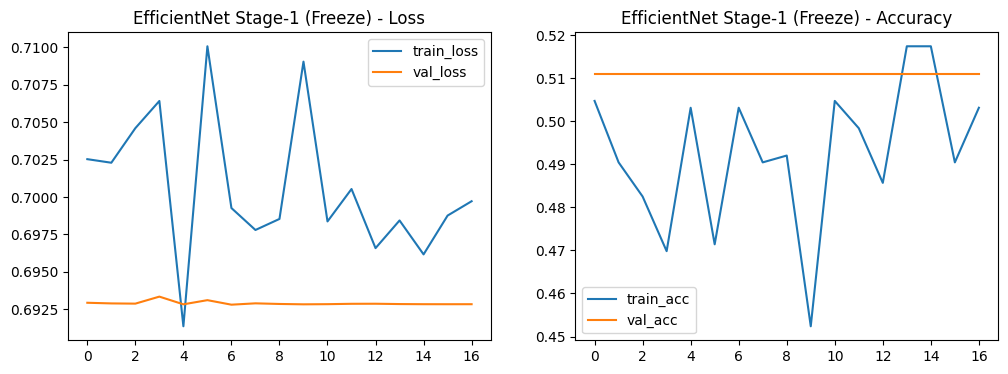

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history["loss"], label="train_loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.title(f"{title} - Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history["accuracy"], label="train_acc")
    plt.plot(history.history["val_accuracy"], label="val_acc")
    plt.title(f"{title} - Accuracy")
    plt.legend()

    plt.show()

plot_history(history_eff_1, "EfficientNet Stage-1 (Freeze)")


In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)

# base model
base_eff = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)
base_eff.trainable = False  # Stage-1: freeze

# head
inputs = tf.keras.Input(shape=(224, 224, 3))
x = inputs

# Eğer sen normalize'u dataset'te yapıyorsan (1/255), burayı koymana gerek yok.
# Ama emin olmak için burada da güvenli şekilde koyabiliriz:
# x = tf.keras.layers.Rescaling(1./255)(x)

x = base_eff(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

efficientnet_model = tf.keras.Model(inputs, outputs, name="EfficientNetB0_TL")

efficientnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

efficientnet_model.summary()


Model: "EfficientNetB0_TL"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
callbacks_eff_1 = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=10, restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6
    )
]

history_eff_1 = efficientnet_model.fit(
    train_ds_aug,                 # augmentation sadece train
    validation_data=val_ds,
    epochs=100,
    callbacks=callbacks_eff_1
)

print("EffNet Stage-1 Best Val Accuracy:", max(history_eff_1.history["val_accuracy"]))
print("EffNet Stage-1 Best Val Loss:", min(history_eff_1.history["val_loss"]))


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5173 - loss: 0.6945 - val_accuracy: 0.5111 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5217 - loss: 0.6942 - val_accuracy: 0.5111 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5337 - loss: 0.6902 - val_accuracy: 0.5111 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4958 - loss: 0.7095 - val_accuracy: 0.5111 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5078 - loss: 0.6974 - val_accuracy: 0.5111 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4889 - loss: 0.7068 - val_accuracy: 0.5111 - val_loss: 0.6938 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5087 - loss: 0.7072 - val_acc

##EfficientNet – Test Metrikleri (Accuracy, Precision, Recall, F1, ROC-AUC + CM + ROC)

Test setinden gerçek etiketleri (y_true) çek

In [ ]:
import numpy as np

y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0).reshape(-1)
print("y_true shape:", y_true.shape, "unique:", np.unique(y_true, return_counts=True))


y_true shape: (135,) unique: (array([0, 1]), array([70, 65]))


EfficientNet tahminleri (prob + label)

In [ ]:
y_prob_eff = efficientnet_model.predict(test_ds).ravel()
y_pred_eff = (y_prob_eff >= 0.5).astype(int)

print("y_prob_eff shape:", y_prob_eff.shape)
print("Pred counts:", np.unique(y_pred_eff, return_counts=True))


4/5 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
y_prob_eff shape: (135,)
Pred counts: (array([0]), array([135]))


Classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred_eff,
    target_names=["Pigmented Benign Keratosis", "Melanoma"],
    zero_division=0
))


                            precision    recall  f1-score   support

Pigmented Benign Keratosis       0.52      1.00      0.68        70
                  Melanoma       0.00      0.00      0.00        65

                  accuracy                           0.52       135
                 macro avg       0.26      0.50      0.34       135
              weighted avg       0.27      0.52      0.35       135



Confusion Matrix

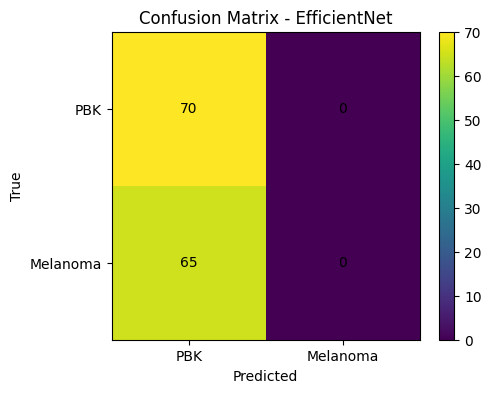

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_eff)

plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title("Confusion Matrix - EfficientNet")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks([0,1], ["PBK", "Melanoma"])
plt.yticks([0,1], ["PBK", "Melanoma"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.colorbar()
plt.show()


ROC-AUC + ROC Curve

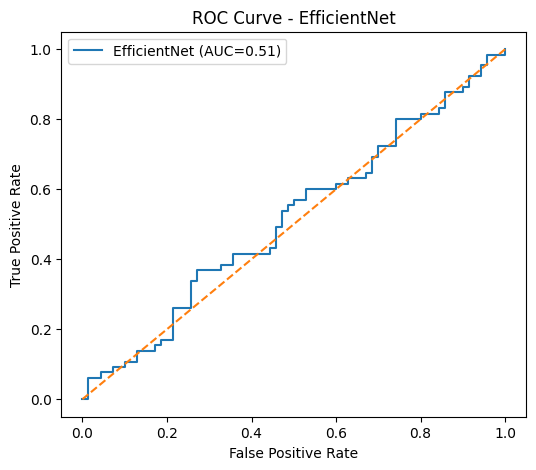

EfficientNet ROC-AUC: 0.5140659340659341


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_eff = roc_auc_score(y_true, y_prob_eff)
fpr, tpr, _ = roc_curve(y_true, y_prob_eff)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"EfficientNet (AUC={auc_eff:.2f})")
plt.plot([0,1], [0,1], "--")
plt.title("ROC Curve - EfficientNet")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("EfficientNet ROC-AUC:", auc_eff)


3 Modeli Aynı ROC Grafiğinde Çizme

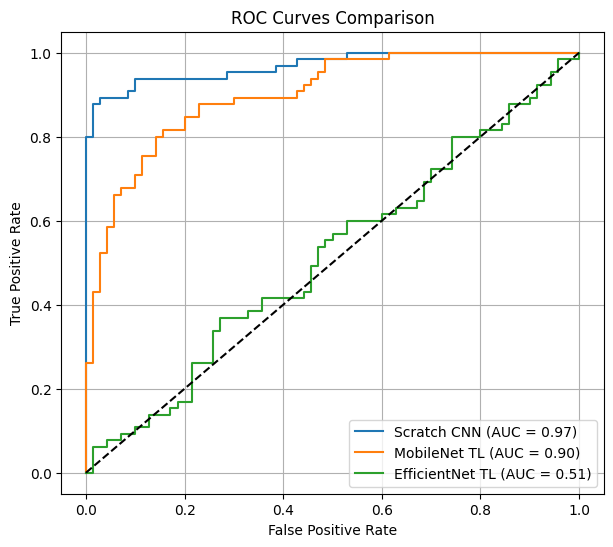

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1) ROC curve hesapla
fpr_s, tpr_s, _ = roc_curve(y_true, y_pred_prob)               # Scratch
auc_s = auc(fpr_s, tpr_s)

fpr_m, tpr_m, _ = roc_curve(y_true, y_pred_prob_mobilenet)     # MobileNet
auc_m = auc(fpr_m, tpr_m)

fpr_e, tpr_e, _ = roc_curve(y_true, y_prob_eff)                # EfficientNet
auc_e = auc(fpr_e, tpr_e)

# 2) Tek grafikte çiz
plt.figure(figsize=(7,6))

plt.plot(fpr_s, tpr_s, label=f"Scratch CNN (AUC = {auc_s:.2f})")
plt.plot(fpr_m, tpr_m, label=f"MobileNet TL (AUC = {auc_m:.2f})")
plt.plot(fpr_e, tpr_e, label=f"EfficientNet TL (AUC = {auc_e:.2f})")
plt.plot([0, 1], [0, 1], 'k--') # Diagonal random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

##ADIM 8 - XAI: Grad-CAM



In [ ]:
print("Best model:", best_model)
print("Model name:", best_model.name)
print("Model layers:")
for i, l in enumerate(best_model.layers):
    print(i, l.name, type(l))


Best model: <Functional name=functional_1, built=True>
Model name: functional_1
Model layers:
0 input_layer_3 <class 'keras.src.layers.core.input_layer.InputLayer'>
1 mobilenetv2_1.00_224 <class 'keras.src.models.functional.Functional'>
2 global_average_pooling2d_1 <class 'keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D'>
3 dropout_5 <class 'keras.src.layers.regularization.dropout.Dropout'>
4 dense_2 <class 'keras.src.layers.core.dense.Dense'>


In [ ]:
images_batch, labels_batch = next(iter(test_ds))
print("Image dtype:", images_batch.dtype)
print("Min pixel:", images_batch.numpy().min())
print("Max pixel:", images_batch.numpy().max())
print("Shape:", images_batch.shape)


Image dtype: <dtype: 'float32'>
Min pixel: 0.0
Max pixel: 1.0
Shape: (32, 224, 224, 3)


Using last conv layer inside backbone: Conv_1
Batch size: 32
Correct in this batch: 27
Wrong in this batch: 5
Selected indices: [np.int64(0), np.int64(1), np.int64(2), np.int64(9), np.int64(12), np.int64(18)]


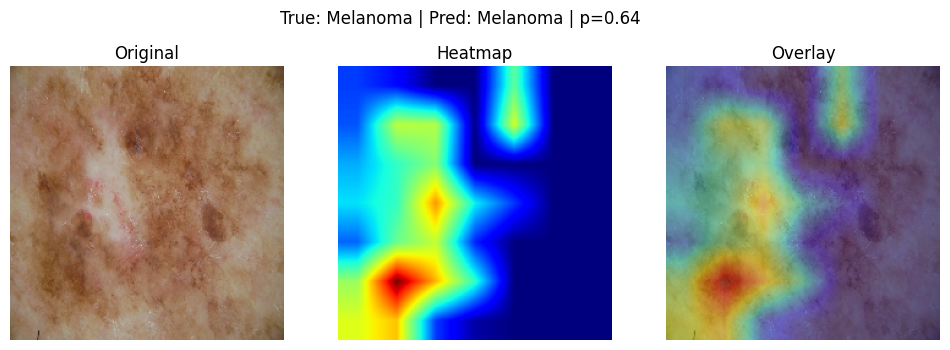

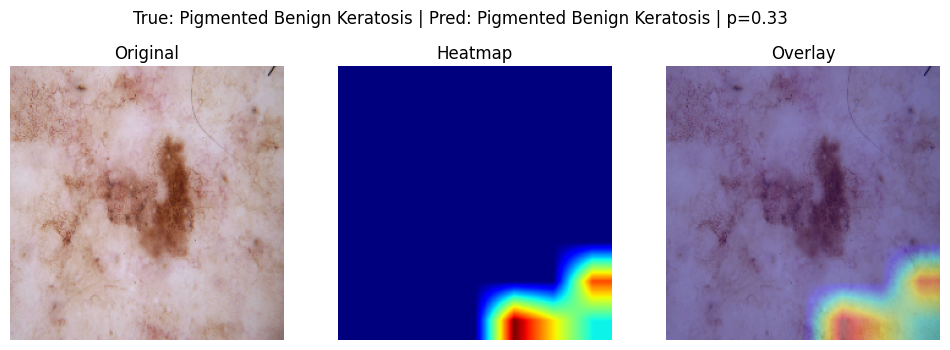

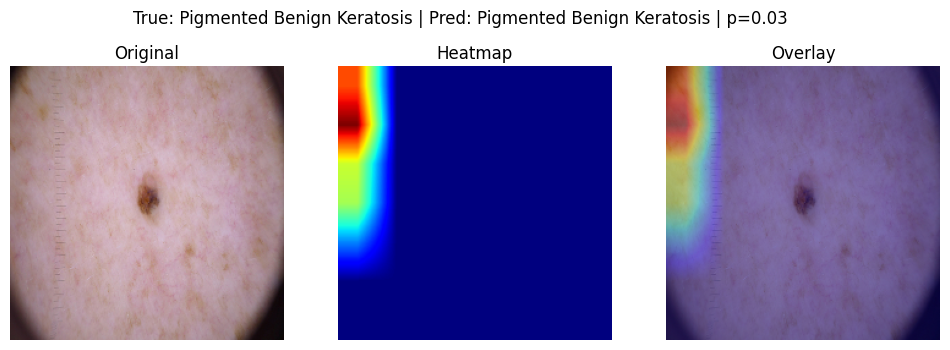

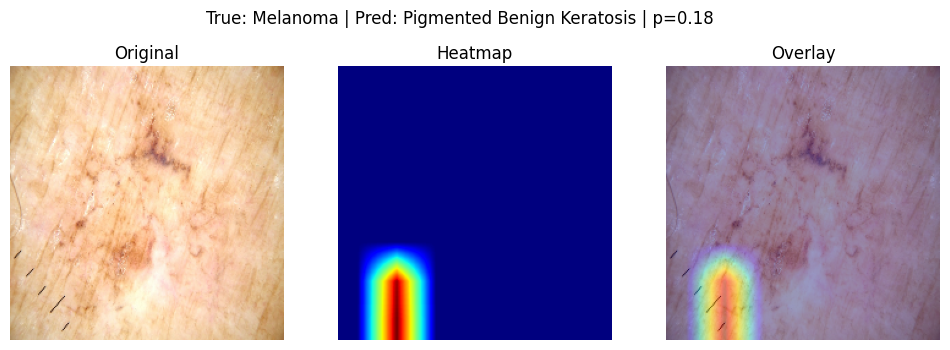

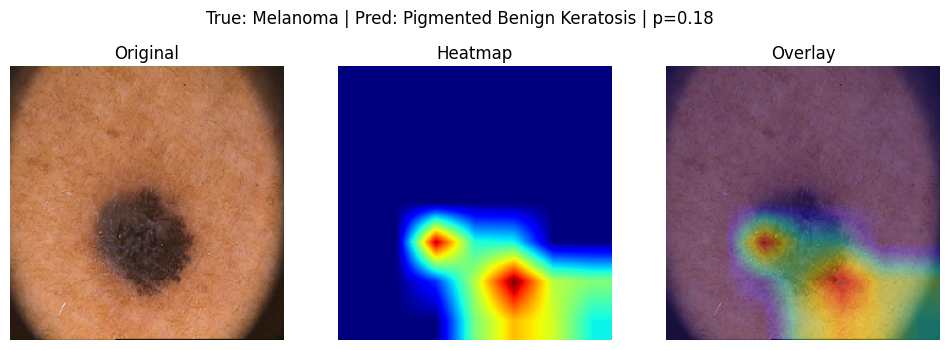

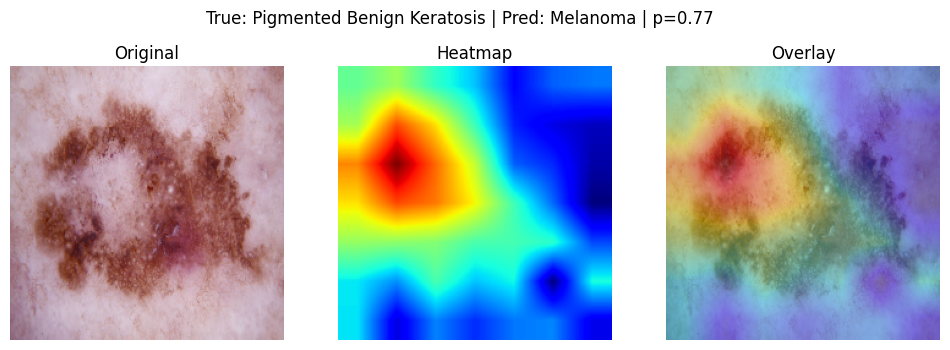

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# ---------- 0) Backbone'u çek (nested model) ----------
base_model = best_model.get_layer("mobilenetv2_1.00_224")

# ---------- 1) Backbone içinde son Conv2D layer'ını bul ----------
def find_last_conv2d_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, keras.layers.Conv2D):
            return layer.name
        # bazı modellerde conv blokları nested olabilir; varsa içeri de bak
        if isinstance(layer, keras.Model):
            inner = find_last_conv2d_layer(layer)
            if inner is not None:
                return inner
    return None

last_conv_name = find_last_conv2d_layer(base_model)
print("Using last conv layer inside backbone:", last_conv_name)

# ---------- 2) Grad-CAM için grad_model kur ----------
# backbone output -> head (GAP + dropout + dense) ile aynı tahmini üretelim
last_conv_layer = base_model.get_layer(last_conv_name)

# Head katmanları wrapper'dan alınıyor
gap_layer = best_model.get_layer("global_average_pooling2d_1")
drop_layer = best_model.get_layer("dropout_5")
dense_layer = best_model.get_layer("dense_2")

# Grad model: backbone input -> (last conv output, final prob)
x = last_conv_layer.output
y = gap_layer(base_model.output)
y = drop_layer(y, training=False)
y = dense_layer(y)
grad_model = keras.Model(inputs=base_model.input, outputs=[x, y])

# ---------- 3) Grad-CAM heatmap fonksiyonu ----------
def make_gradcam_heatmap(img_01, grad_model):
    """
    img_01: (1,224,224,3) float32 in [0,1]
    returns: heatmap (224,224) in [0,1], prob scalar
    """
    with tf.GradientTape() as tape:
        conv_out, preds = grad_model(img_01, training=False)
        prob = preds[:, 0]
    grads = tape.gradient(prob, conv_out)  # (1,h,w,c)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # (c,)

    conv_out = conv_out[0]  # (h,w,c)
    heatmap = tf.reduce_sum(conv_out * pooled_grads, axis=-1)  # (h,w)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= (tf.reduce_max(heatmap) + 1e-8)

    heatmap = tf.image.resize(heatmap[..., tf.newaxis], (224, 224))
    heatmap = tf.squeeze(heatmap).numpy()
    return heatmap, float(prob.numpy()[0])

# ---------- 4) Görselleştirme ----------
def show_gradcam_triplet(img_01, heatmap, title="", alpha=0.4):
    """
    img_01: (224,224,3) float32 [0,1]
    """
    # heatmap'i renklendir
    cmap = plt.get_cmap("jet")
    heat_rgb = cmap(heatmap)[..., :3]  # (224,224,3)

    overlay = (1 - alpha) * img_01 + alpha * heat_rgb
    overlay = np.clip(overlay, 0, 1)

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1); plt.imshow(img_01); plt.axis("off"); plt.title("Original")
    plt.subplot(1,3,2); plt.imshow(heatmap, cmap="jet"); plt.axis("off"); plt.title("Heatmap")
    plt.subplot(1,3,3); plt.imshow(overlay); plt.axis("off"); plt.title("Overlay")
    plt.suptitle(title)
    plt.show()

# ---------- 5) Test batch'ten 3 doğru + 3 yanlış seç ----------
class_names = ["Pigmented Benign Keratosis", "Melanoma"]

images, labels = next(iter(test_ds))
probs = best_model.predict(images, verbose=0).reshape(-1)
preds = (probs >= 0.5).astype(int)
labels_np = labels.numpy().astype(int)

correct_idx = np.where(preds == labels_np)[0]
wrong_idx   = np.where(preds != labels_np)[0]

pick = []
pick += list(correct_idx[:3])
pick += list(wrong_idx[:3])

print("Batch size:", len(images))
print("Correct in this batch:", len(correct_idx))
print("Wrong in this batch:", len(wrong_idx))
print("Selected indices:", pick)

# eğer yanlış yoksa (ya da azsa) kalanını doğrulardan doldur
if len(pick) < 6:
    remain = [i for i in correct_idx if i not in pick]
    pick += remain[:(6-len(pick))]

# ---------- 6) 6 örnek için Grad-CAM çiz ----------
for i in pick[:6]:
    img = images[i].numpy()  # (224,224,3) [0,1]
    true = int(labels_np[i])
    pred = int(preds[i])
    img_in = np.expand_dims(img, axis=0).astype(np.float32)

    heatmap, p = make_gradcam_heatmap(img_in, grad_model)
    title = f"True: {class_names[true]} | Pred: {class_names[pred]} | p={p:.2f}"
    show_gradcam_triplet(img, heatmap, title=title, alpha=0.4)
